[288 117 595]


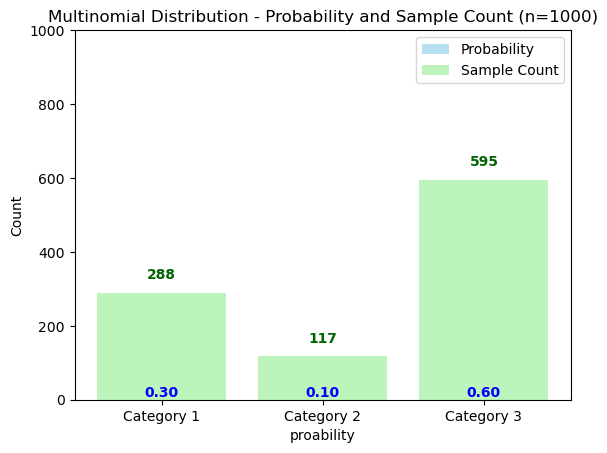

In [11]:
## Multinomial distribution with 3 categories

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multinomial

# Create a sample
p = [0.3, 0.1, 0.6] #set proability to each categray
n = 1000
samples = multinomial.rvs(n, p, size=1).flatten()
print(samples)

# visualize the multinomial distribution and visualize the multinomial sample
category_counts = samples
fig, ax = plt.subplots()

ax.bar([f"Category {i+1}" for i in range(3)], p, 
       color='skyblue', alpha=0.6, label="Probability")
ax.bar([f"Category {i+1}" for i in range(3)], category_counts, 
       color='lightgreen', alpha=0.6, label="Sample Count")
plt.ylim(0, 1000)

for i in range(3):
    ax.text(i, p[i] + 0.01, f'{p[i]:.2f}', ha='center', 
            va='bottom', color='blue', fontweight='bold')
for i in range(3):
    ax.text(i, category_counts[i] + 30, f'{category_counts[i]}', ha='center', 
            va='bottom', color='darkgreen', fontweight='bold')

# Title and labels
plt.title(f"Multinomial Distribution - Probability and Sample Count (n={n})")
plt.ylabel("Count")
plt.xlabel('proability')
plt.legend()
plt.show()

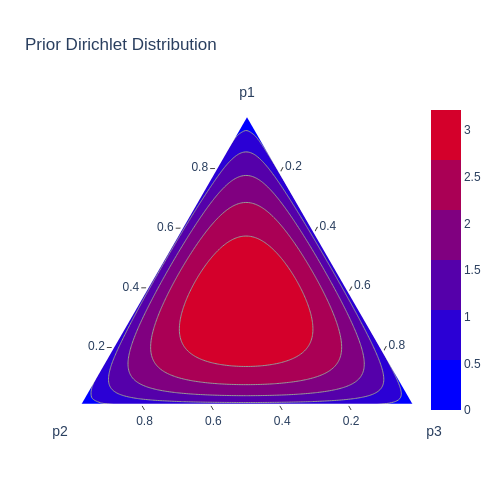

In [23]:
## visualize the simplex Dirichlet distribution of the prior using a ternary plot
import pandas as pd
import numpy as np
from scipy.stats import multinomial
from scipy import stats
import plotly.figure_factory as pff

# Create a prior Dirichlet distribution 
alpha_prior = np.array([1.5, 1.5, 1.5])  
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)

# Create a grid over the simplex for the ternary plot
p1 = np.linspace(0, 1, 100)
p2 = 1 - p1.copy()
p_ = np.linspace(0, 1, 100)
p1 = (p1[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p2 = (p2[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p3 = 1 - p1 - p2
p = np.c_[p1, p2, p3]

# Calculate Dirichlet densities
dirichlet_prior_densities = dirichlet_prior.pdf(p.T)

# Create a ternary contour plot
fig = pff.create_ternary_contour(
    p.T, dirichlet_prior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True,
    title="Prior Dirichlet Distribution"
)
fig.show('png')

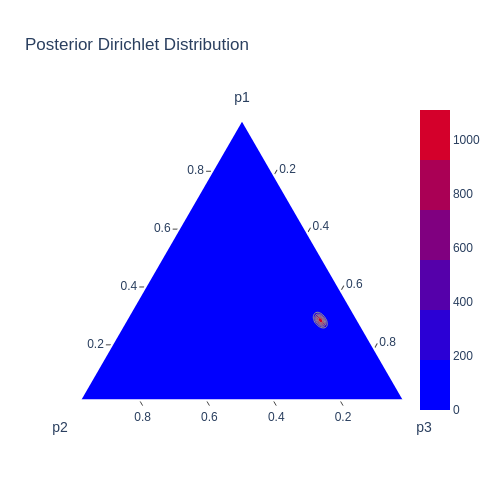

In [28]:
## Visualize Posterior distribution using a ternary plot
alpha_posterior = alpha_prior + samples

# Create the posterior Dirichlet distribution
dirichlet_posterior = stats.dirichlet(alpha=alpha_posterior)

# Calculate posterior densities
dirichlet_posterior_densities = dirichlet_posterior.pdf(p.T)

# Create a ternary contour plot for the posterior distribution
fig_posterior = pff.create_ternary_contour(
    p.T, dirichlet_posterior_densities,  
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True,
    title="Posterior Dirichlet Distribution"  
)
fig_posterior.show('png')